In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_servey = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Bank%20Marketing%20Campaign%20Subscriptions/Bank_Campaign.csv", sep=';', header=[0])

In [3]:
bank_servey.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [4]:
bank_servey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_servey = bank_servey.drop_duplicates()
bank_servey.shape

(41176, 21)

In [6]:
missing_cols = bank_servey.isin(['unknown']).sum(axis=0)
missing_cols

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [7]:
bank_servey.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


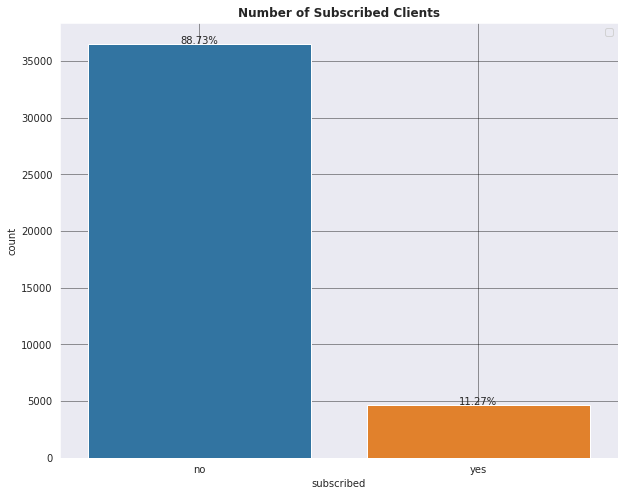

In [8]:
fig = plt.figure(figsize=(10,8)) 
plt.title('Number of Subscribed Clients', fontweight='bold')
ax=sns.countplot(x='subscribed', data=bank_servey)
size = float(bank_servey.shape[0])
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

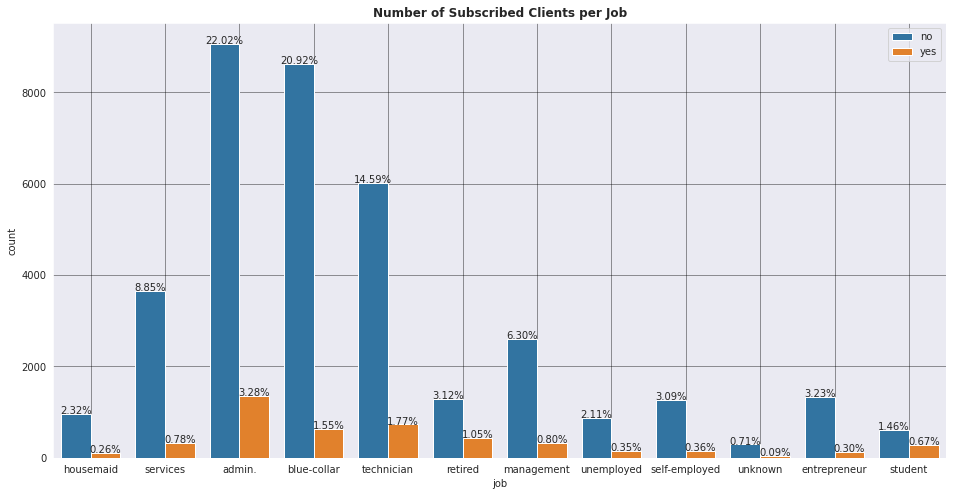

In [9]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Job', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='job', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

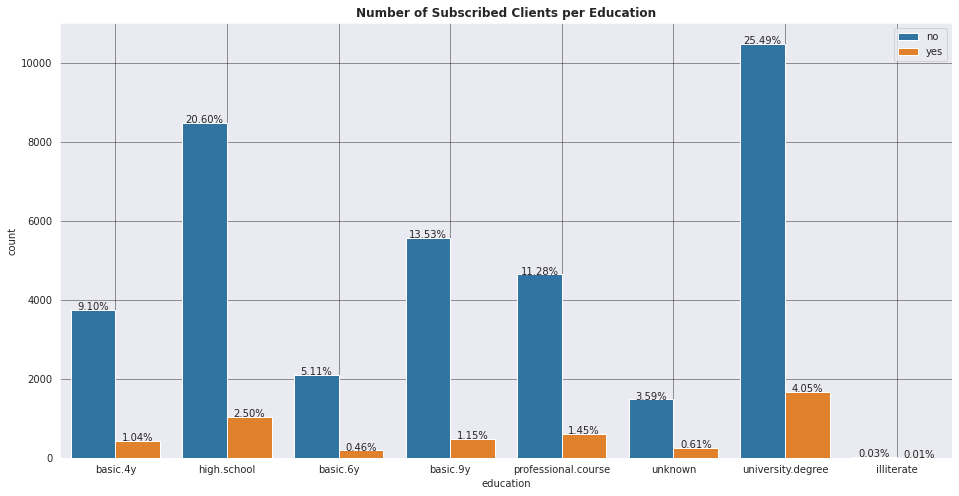

In [10]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per Education', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='education', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

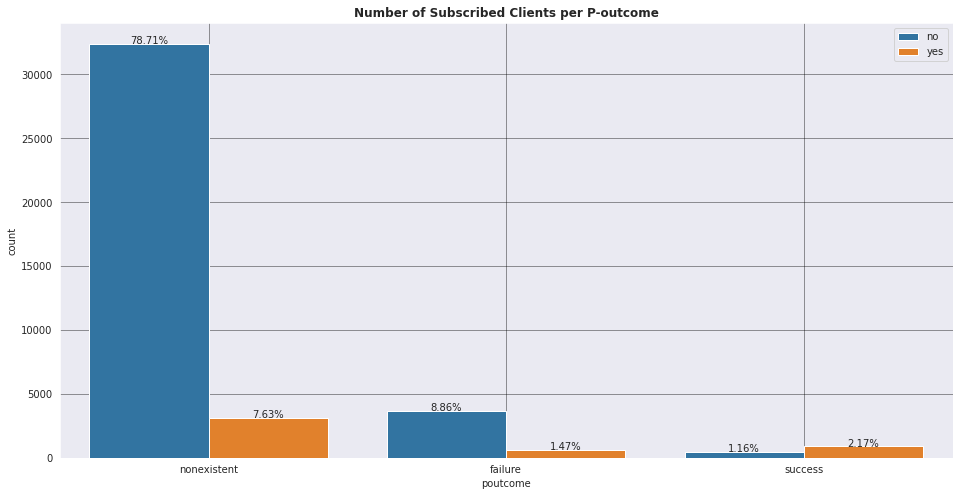

In [11]:
fig = plt.figure(figsize=(16,8)) 
plt.title('Number of Subscribed Clients per P-outcome', fontweight='bold')
ax=sns.countplot(data=bank_servey, x='poutcome', hue='subscribed')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha='center')
plt.grid(True, alpha=0.5, color='black')
plt.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'Relationship between continuous variables')

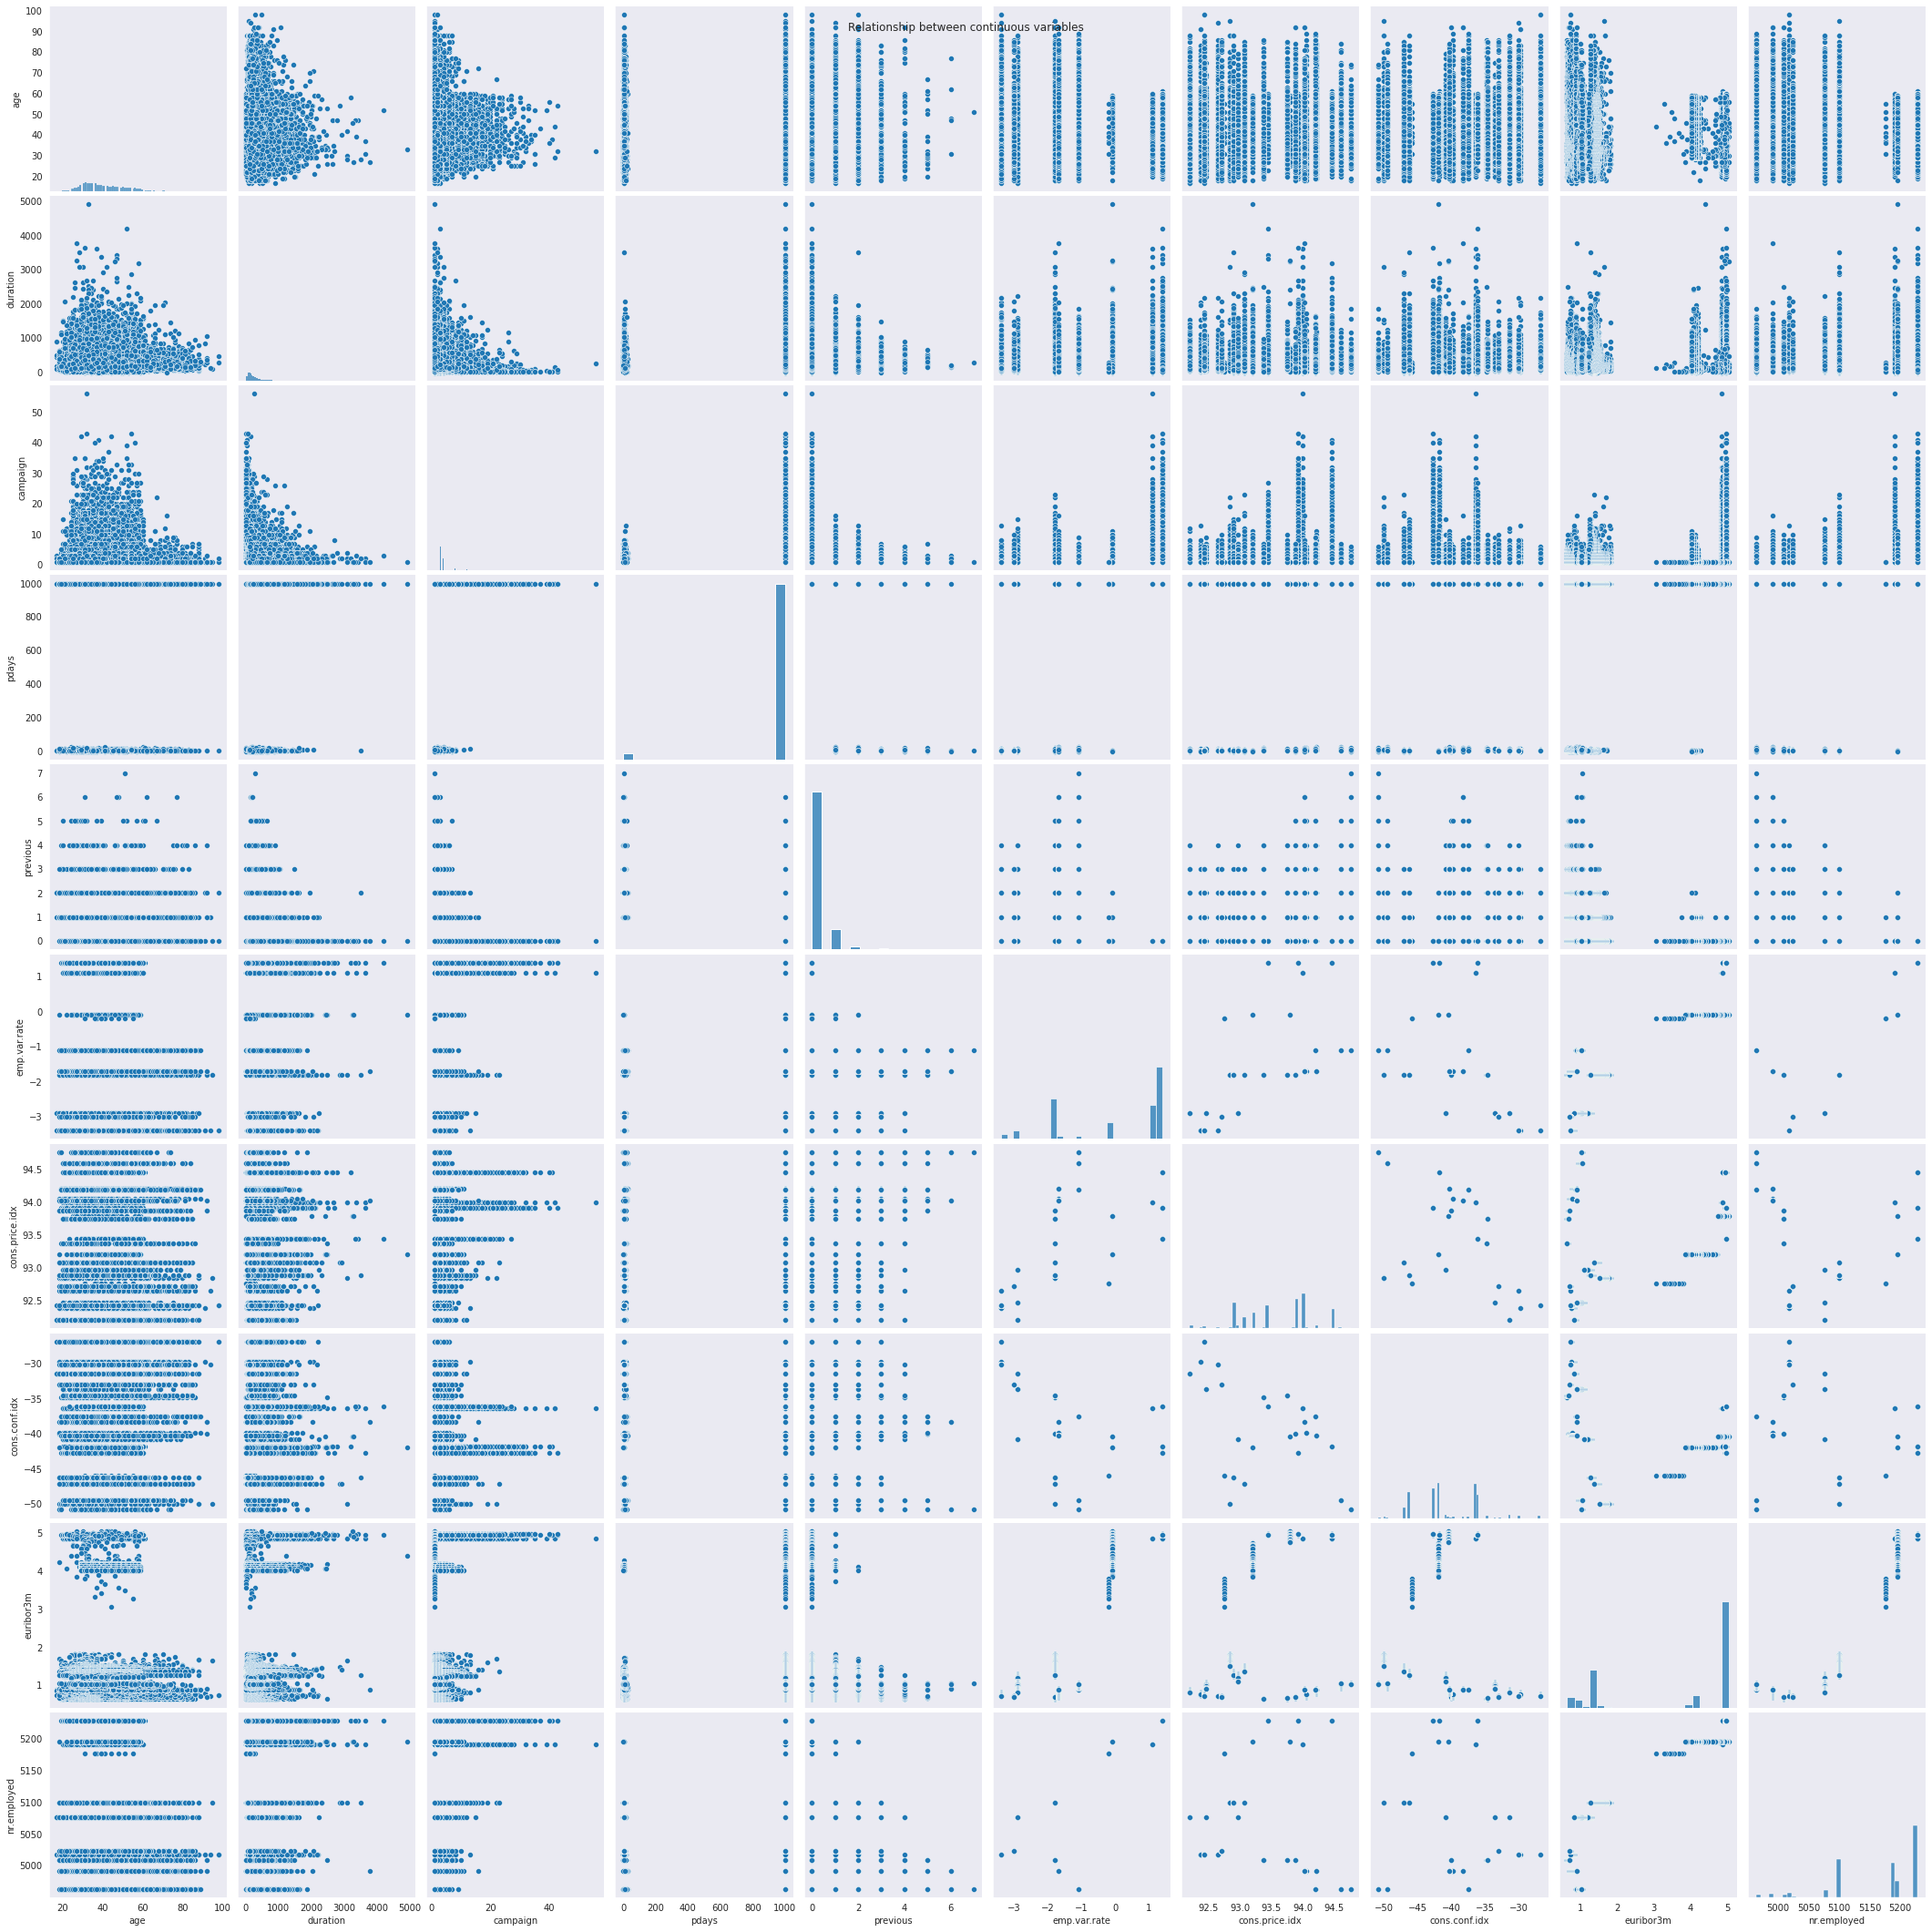

In [12]:
bank_servey.columns
sns.pairplot(bank_servey, size=3)
plt.suptitle('Relationship between continuous variables')

Text(0.5, 0.98, 'Visualizing Multidimensional Relationships')

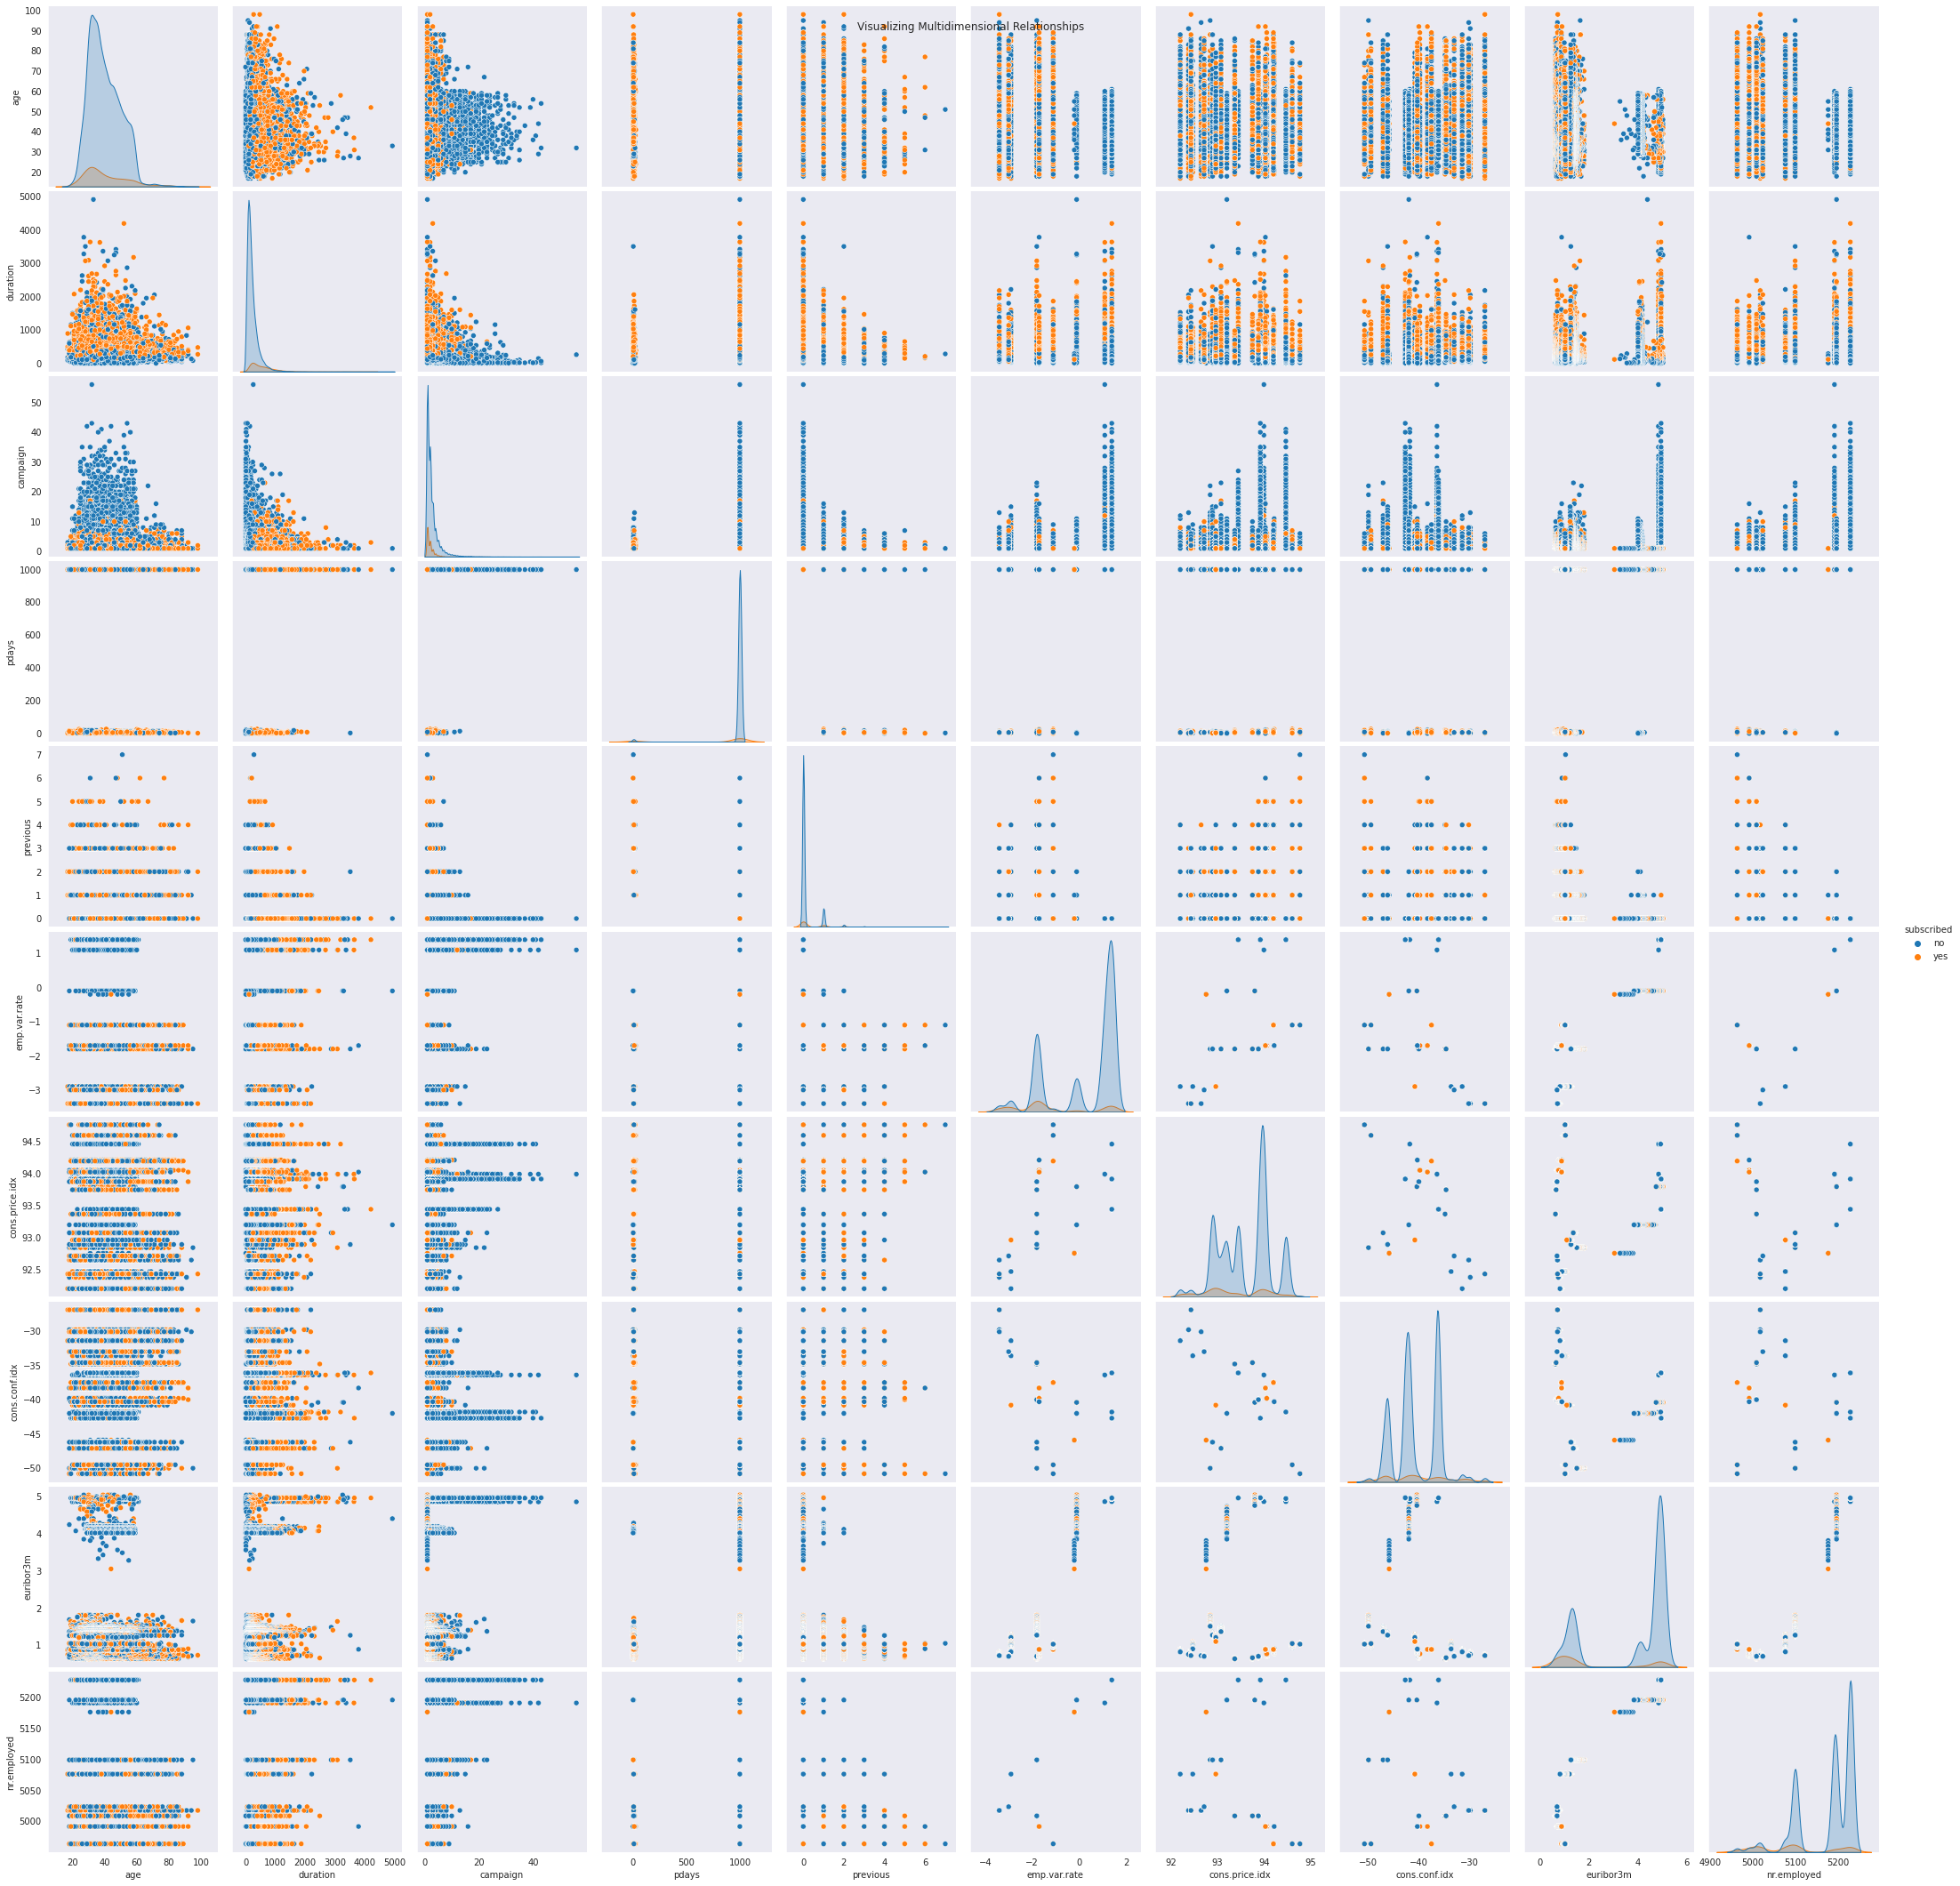

In [13]:
sns.pairplot(bank_servey, hue='subscribed', size=3);
plt.suptitle('Visualizing Multidimensional Relationships')

Text(0.5, 0.98, 'Correlation Matrix')

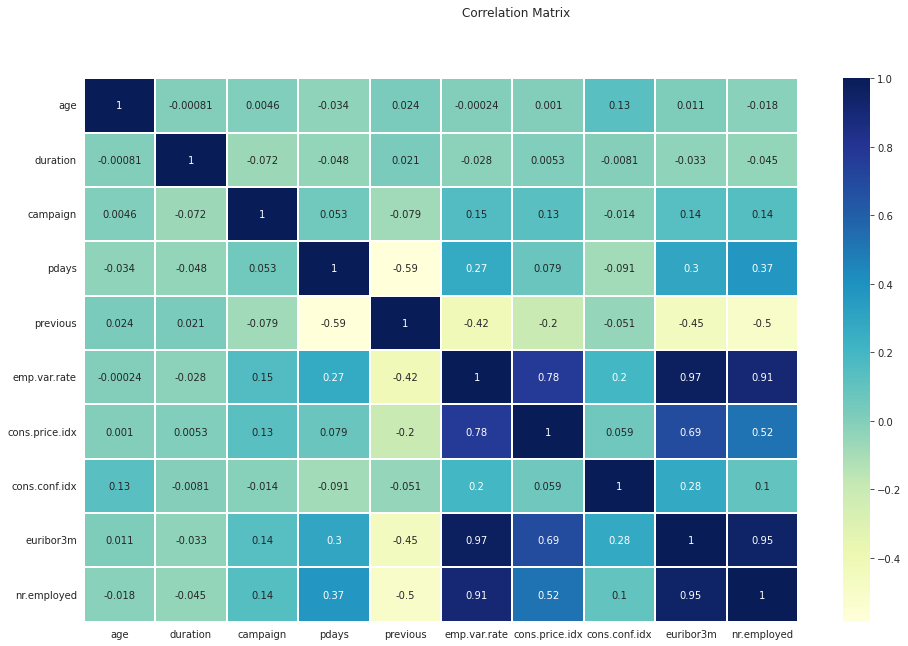

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(bank_servey.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

In [15]:
bank_servey.drop(columns=['pdays'], inplace=True)
bank_servey['subscribed'] = bank_servey['subscribed'].map({'yes': 1, 'no': 0})
categorical_cols = bank_servey.select_dtypes(include=['object']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [16]:
encoded_df = pd.concat([bank_servey, pd.get_dummies(bank_servey[categorical_cols])], axis=1)
encoded_df = encoded_df.drop(categorical_cols, axis=1)
encoded_df.head(10)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
encoded_scaled_df = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)
X = encoded_scaled_df.loc[:, encoded_scaled_df.columns != 'subscribed']
y = encoded_scaled_df['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
def getModelEvaluationMetrics(classifier, model_name: str, x_test: pd.core.frame.DataFrame,
                              y_test: pd.core.frame.DataFrame, y_predicted, plot_confusion_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:

    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n\n {0}'.format(conf_mat))

    if plot_confusion_matrix:
        labels = ['no', 'yes']
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.title(f'Confusion Matrix for {model_name}', fontweight='bold')
        plt.show()

    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))
    print('The precision is: {0} %'.format(precision))

    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))
    print('The recall is: {0} %'.format(recall))

    return conf_mat
def createROCAnalysis(classifier, model_name: str, y_test: pd.core.series.Series, pred_probs: np.ndarray,
                      plot_ROC_Curve=False, figsize=(10, 8)) -> int:
   
    if plot_ROC_Curve:
        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    print(f'{model_name} - ROC AUC score: {auc_score}')

    return auc_score